# OpenCV Basic Operations Tutorial

This notebook demonstrates the fundamental image processing operations using our OpenCV collection.

## Contents
1. [Setup and Installation](#setup)
2. [Loading and Displaying Images](#loading)
3. [Basic Image Information](#info)
4. [Image Transformations](#transformations)
5. [Saving Results](#saving)
6. [Practical Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [1]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from basic_operations import image_io, display, basic_transforms

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## 2. Loading and Displaying Images {#loading}

Let's start by creating a sample image and learning how to load and display images.

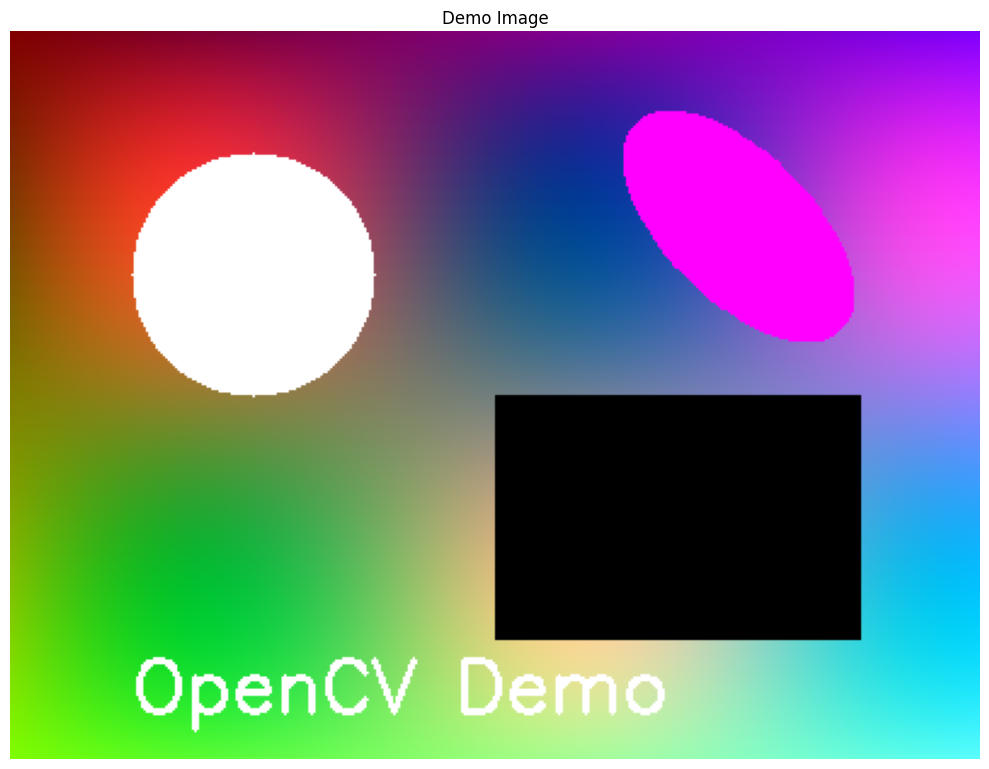

Image saved successfully to '../sample_images/original/demo_image.jpg'


True

In [2]:
# Create a sample image for demonstration
def create_demo_image():
    """Create a colorful demo image with various shapes."""
    import cv2
    
    # Create base image with gradient
    height, width = 300, 400
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Create colorful gradient
    for y in range(height):
        for x in range(width):
            image[y, x] = [
                int(255 * x / width),
                int(255 * y / height),
                int(128 + 127 * np.sin(x * 0.02) * np.sin(y * 0.02))
            ]
    
    # Add shapes
    cv2.circle(image, (100, 100), 50, (255, 255, 255), -1)
    cv2.rectangle(image, (200, 150), (350, 250), (0, 0, 0), -1)
    cv2.ellipse(image, (300, 80), (60, 30), 45, 0, 360, (255, 0, 255), -1)
    
    # Add text
    cv2.putText(image, "OpenCV Demo", (50, 280), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    return image

# Create and display our demo image
demo_image = create_demo_image()
display.show_image(demo_image, "Demo Image", backend='matplotlib')

# Save the demo image for later use
os.makedirs('../sample_images/original', exist_ok=True)
image_io.save_image(demo_image, '../sample_images/original/demo_image.jpg')

### Loading Images from Files

Now let's learn different ways to load images:

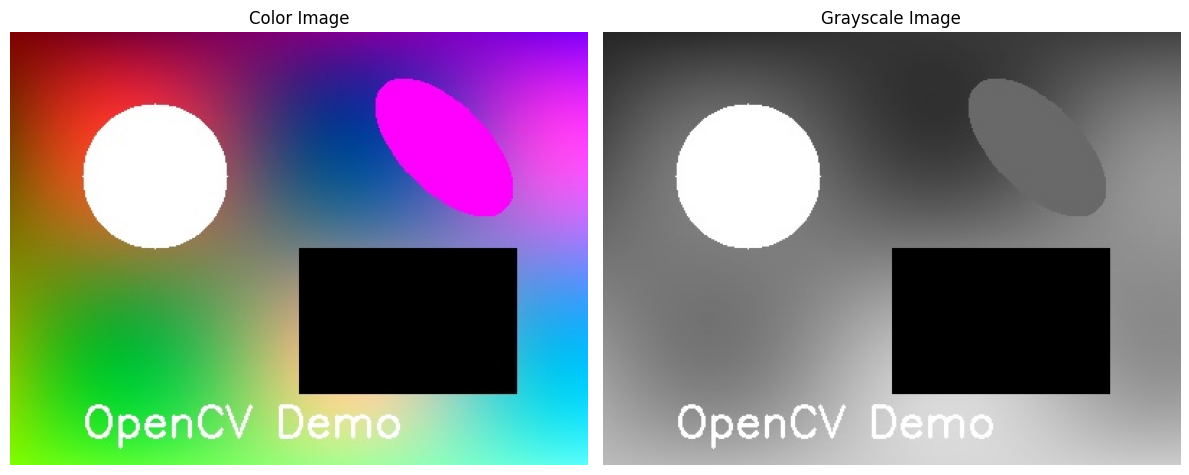

In [3]:
# Load image in different color modes
color_image = image_io.load_image('../sample_images/original/demo_image.jpg', 'color')
gray_image = image_io.load_image('../sample_images/original/demo_image.jpg', 'grayscale')
unchanged_image = image_io.load_image('../sample_images/original/demo_image.jpg', 'unchanged')

# Display comparison
images = [color_image, gray_image]
titles = ['Color Image', 'Grayscale Image']
display.show_comparison(images, titles, figsize=(12, 5))

## 3. Basic Image Information {#info}

Let's examine the properties of our loaded image:

In [4]:
# Get detailed image information
info = image_io.get_image_info(color_image)

print("📊 Image Information:")
print("=" * 30)
for key, value in info.items():
    print(f"{key:15}: {value}")

# Validate image
is_valid = image_io.validate_image(color_image)
print(f"\n✅ Image is valid: {is_valid}")

📊 Image Information:
shape          : (300, 400, 3)
dtype          : uint8
size           : 360000
channels       : 3
min_value      : 0.0
max_value      : 255.0
mean_value     : 117.97515833333334
memory_usage_mb: 0.34332275390625

✅ Image is valid: True


## 4. Image Transformations {#transformations}

Now let's explore various image transformations:

### 4.1 Resizing Images

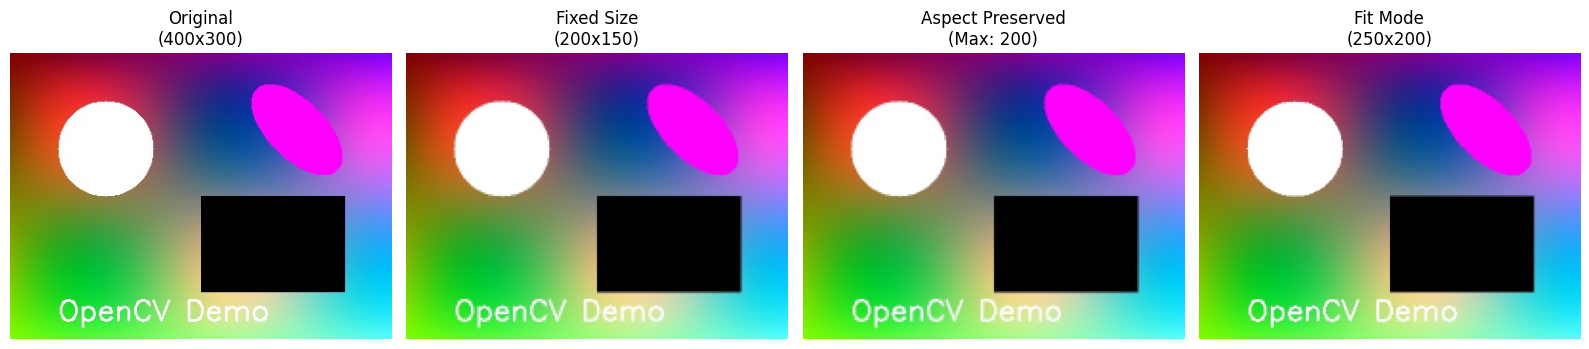

In [5]:
# Different resizing methods
original = color_image.copy()

# Fixed size resize
resized_fixed = basic_transforms.resize_image(original, (200, 150))

# Resize with aspect ratio preserved
resized_aspect = basic_transforms.resize_with_aspect_ratio(original, 200)

# Different fit modes
resized_fit = basic_transforms.resize_with_aspect_ratio(original, (250, 200), 'fit')
resized_fill = basic_transforms.resize_with_aspect_ratio(original, (250, 200), 'fill')

# Display comparison
resize_images = [original, resized_fixed, resized_aspect, resized_fit]
resize_titles = ['Original\n(400x300)', 'Fixed Size\n(200x150)', 'Aspect Preserved\n(Max: 200)', 'Fit Mode\n(250x200)']

display.show_comparison(resize_images, resize_titles, figsize=(16, 4))

### 4.2 Rotation

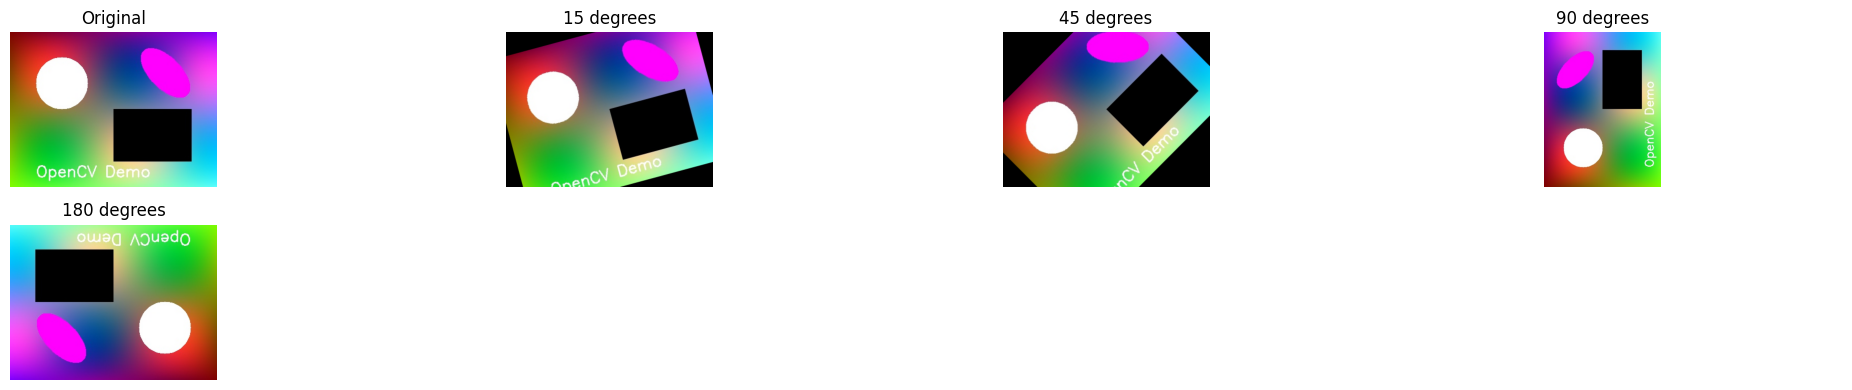

In [6]:
# Different rotation examples
rotated_15 = basic_transforms.rotate_image(original, 15)
rotated_45 = basic_transforms.rotate_image(original, 45)
rotated_90 = basic_transforms.rotate_image_90(original, 1)  # Optimized 90-degree rotation
rotated_180 = basic_transforms.rotate_image_90(original, 2)

# Display rotation comparison
rotation_images = [original, rotated_15, rotated_45, rotated_90, rotated_180]
rotation_titles = ['Original', '15 degrees', '45 degrees', '90 degrees', '180 degrees']

display.show_comparison(rotation_images, rotation_titles, figsize=(20, 4))

### 4.3 Flipping

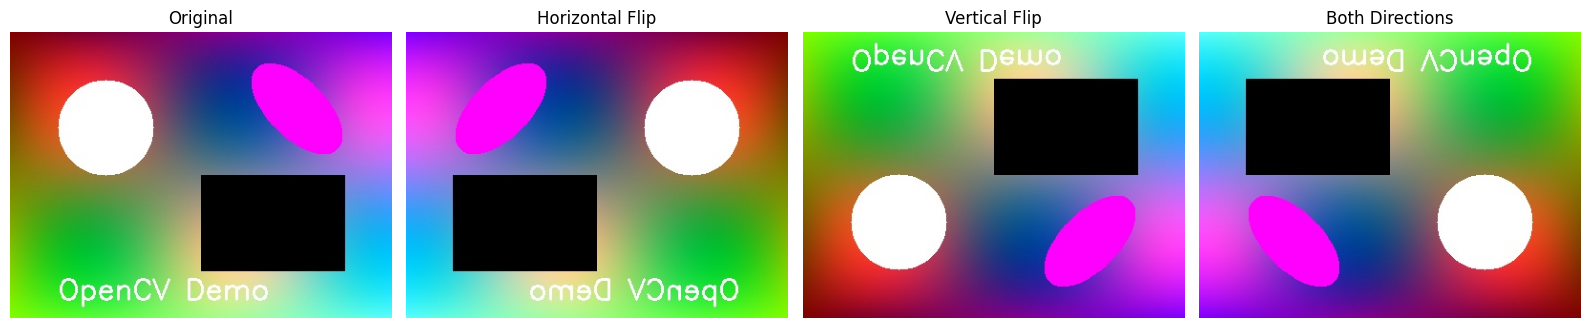

In [7]:
# Different flip operations
flipped_horizontal = basic_transforms.flip_image(original, 1)
flipped_vertical = basic_transforms.flip_image(original, 0)
flipped_both = basic_transforms.flip_image(original, -1)

# Display flip comparison
flip_images = [original, flipped_horizontal, flipped_vertical, flipped_both]
flip_titles = ['Original', 'Horizontal Flip', 'Vertical Flip', 'Both Directions']

display.show_comparison(flip_images, flip_titles, figsize=(16, 4))

### 4.4 Cropping

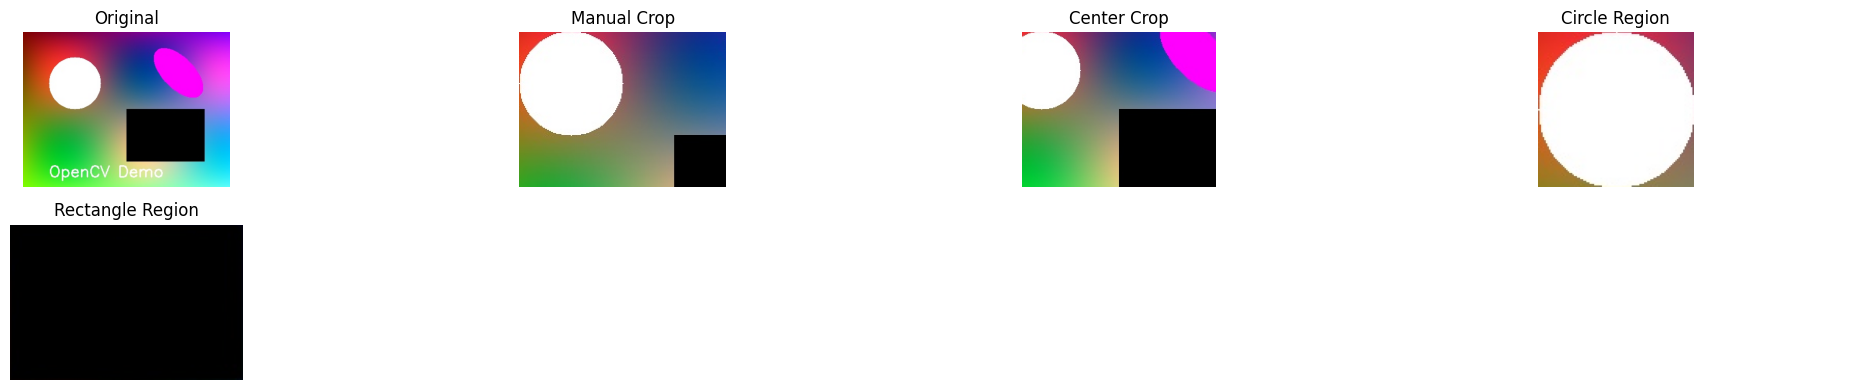

In [8]:
# Different cropping methods
# Manual crop
cropped_manual = basic_transforms.crop_image(original, 50, 50, 200, 150)

# Center crop
cropped_center = basic_transforms.crop_center(original, (250, 200))

# Focus on specific regions
crop_circle = basic_transforms.crop_image(original, 50, 50, 100, 100)  # Circle region
crop_rectangle = basic_transforms.crop_image(original, 200, 150, 150, 100)  # Rectangle region

# Display crop comparison
crop_images = [original, cropped_manual, cropped_center, crop_circle, crop_rectangle]
crop_titles = ['Original', 'Manual Crop', 'Center Crop', 'Circle Region', 'Rectangle Region']

display.show_comparison(crop_images, crop_titles, figsize=(20, 4))

### 4.5 Translation and Padding

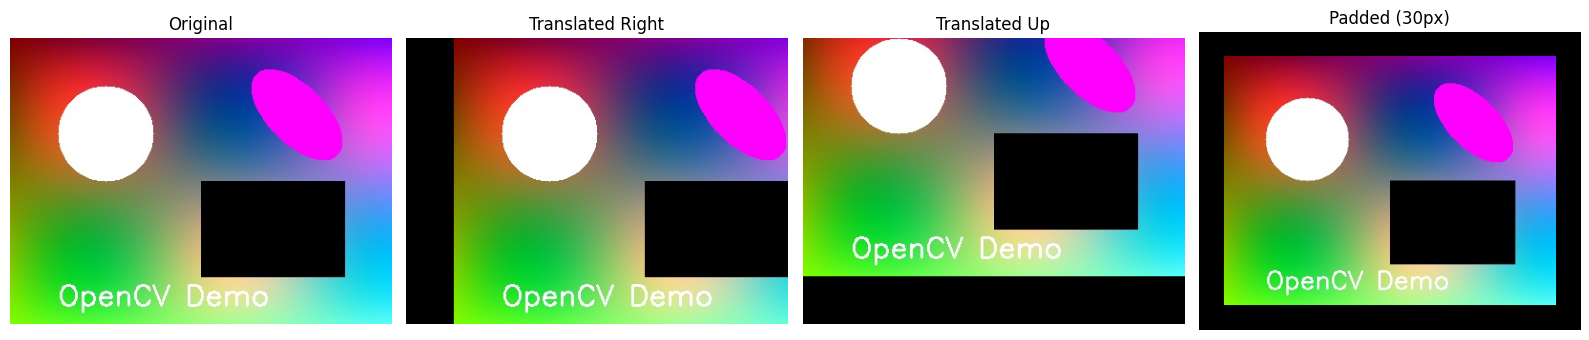

In [9]:
# Translation (shifting)
translated_right = basic_transforms.translate_image(original, 50, 0)
translated_up = basic_transforms.translate_image(original, 0, -50)
translated_both = basic_transforms.translate_image(original, 30, -30)

# Padding
padded_uniform = basic_transforms.pad_image(original, 30)
padded_custom = basic_transforms.pad_image(original, (20, 40, 60, 80))  # top, bottom, left, right

# Display translation and padding comparison
transform_images = [original, translated_right, translated_up, padded_uniform]
transform_titles = ['Original', 'Translated Right', 'Translated Up', 'Padded (30px)']

display.show_comparison(transform_images, transform_titles, figsize=(16, 4))

## 5. Saving Results {#saving}

Let's save our processed images:

In [10]:
# Create output directory
output_dir = '../sample_images/processed'
os.makedirs(output_dir, exist_ok=True)

# Save different transformations
transformations_to_save = {
    'resized_200x150.jpg': resized_fixed,
    'rotated_45_degrees.jpg': rotated_45,
    'flipped_horizontal.jpg': flipped_horizontal,
    'cropped_center.jpg': cropped_center,
    'translated_shifted.jpg': translated_both,
    'padded_30px.jpg': padded_uniform
}

print("💾 Saving processed images...")
saved_count = 0

for filename, image in transformations_to_save.items():
    output_path = os.path.join(output_dir, filename)
    if image_io.save_image(image, output_path, quality=90):
        saved_count += 1
        print(f"  ✅ {filename}")
    else:
        print(f"  ❌ Failed to save {filename}")

print(f"\n📁 Successfully saved {saved_count}/{len(transformations_to_save)} images to {output_dir}")

💾 Saving processed images...
Image saved successfully to '../sample_images/processed/resized_200x150.jpg'
  ✅ resized_200x150.jpg
Image saved successfully to '../sample_images/processed/rotated_45_degrees.jpg'
  ✅ rotated_45_degrees.jpg
Image saved successfully to '../sample_images/processed/flipped_horizontal.jpg'
  ✅ flipped_horizontal.jpg
Image saved successfully to '../sample_images/processed/cropped_center.jpg'
  ✅ cropped_center.jpg
Image saved successfully to '../sample_images/processed/translated_shifted.jpg'
  ✅ translated_shifted.jpg
Image saved successfully to '../sample_images/processed/padded_30px.jpg'
  ✅ padded_30px.jpg

📁 Successfully saved 6/6 images to ../sample_images/processed


### Save Comparison Images

In [11]:
# Create and save comparison images
all_transforms = [
    original, resized_fixed, rotated_45, flipped_horizontal,
    cropped_center, translated_both, padded_uniform
]

all_titles = [
    'Original', 'Resized', 'Rotated 45°', 'Flipped H',
    'Center Crop', 'Translated', 'Padded'
]

# Save the comparison as a single image
comparison_path = os.path.join(output_dir, 'all_transformations_comparison.png')
success = display.save_comparison(
    all_transforms, 
    comparison_path, 
    all_titles, 
    grid_size=(2, 4), 
    figsize=(16, 8), 
    dpi=150
)

if success:
    print(f"📊 Comparison image saved to: {comparison_path}")
else:
    print("❌ Failed to save comparison image")

Comparison saved to '../sample_images/processed/all_transformations_comparison.png'
📊 Comparison image saved to: ../sample_images/processed/all_transformations_comparison.png


## 6. Practical Exercises {#exercises}

Now it's your turn! Try these exercises to practice what you've learned:

### Exercise 1: Create a Thumbnail Gallery

Create a function that generates thumbnails of different sizes from an image:

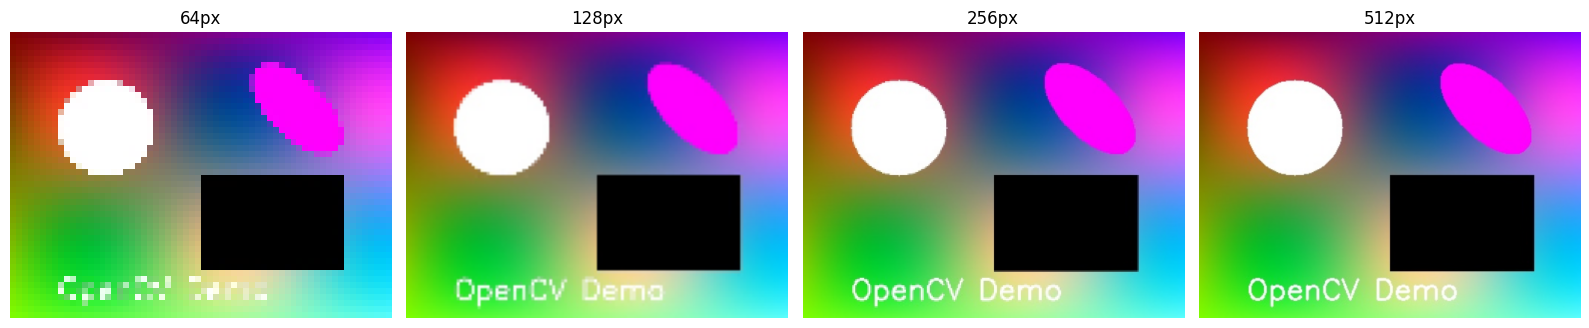

In [12]:
def create_thumbnail_gallery(image, sizes=[64, 128, 256, 512]):
    """
    Create thumbnails of different sizes from an image.
    
    Args:
        image: Input image
        sizes: List of maximum dimensions for thumbnails
    
    Returns:
        List of thumbnail images
    """
    thumbnails = []
    thumbnail_titles = []
    
    # TODO: Implement this function
    # Hint: Use basic_transforms.resize_with_aspect_ratio()
    
    for size in sizes:
        # Your code here
        thumbnail = basic_transforms.resize_with_aspect_ratio(image, size)
        if thumbnail is not None:
            thumbnails.append(thumbnail)
            thumbnail_titles.append(f'{size}px')
    
    return thumbnails, thumbnail_titles

# Test your function
thumbnails, thumb_titles = create_thumbnail_gallery(original)
display.show_comparison(thumbnails, thumb_titles, figsize=(16, 4))

### Exercise 2: Create an Image Mosaic

Create a mosaic by applying different transformations to the same image:

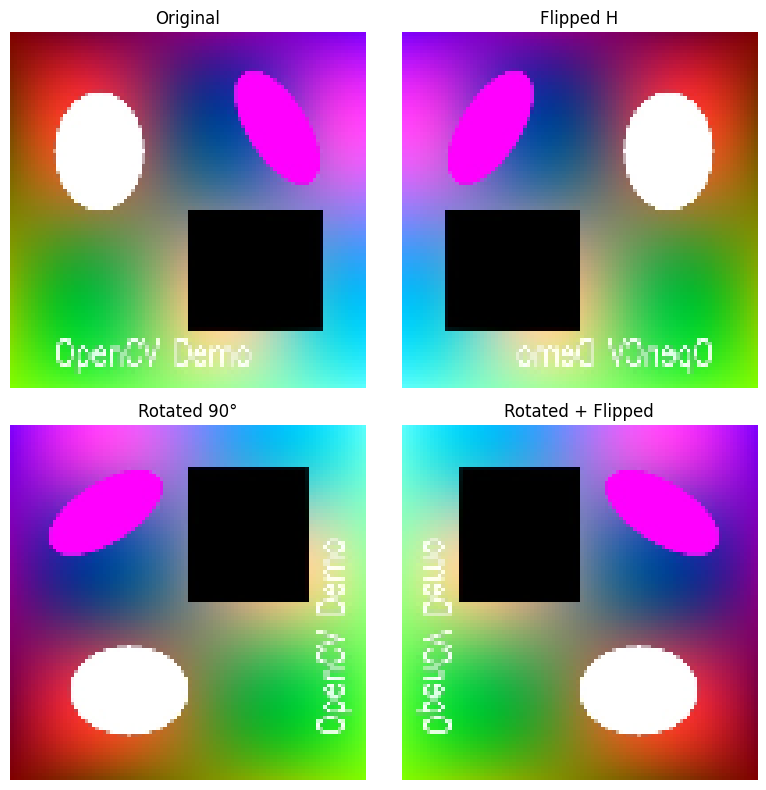

In [13]:
def create_mosaic(image, tile_size=(100, 100)):
    """
    Create a mosaic with different transformations of the same image.
    
    Args:
        image: Input image
        tile_size: Size of each mosaic tile
    
    Returns:
        Mosaic image
    """
    # TODO: Implement this function
    # Create different transformations and arrange them in a grid
    
    # Resize base image to tile size
    base = basic_transforms.resize_image(image, tile_size)
    
    # Create various transformations
    transforms = [
        base,  # Original
        basic_transforms.flip_image(base, 1),  # Horizontal flip
        basic_transforms.rotate_image_90(base, 1),  # 90 degree rotation
        basic_transforms.flip_image(basic_transforms.rotate_image_90(base, 1), 1),  # Rotated + flipped
    ]
    
    # Display the mosaic tiles
    mosaic_titles = ['Original', 'Flipped H', 'Rotated 90°', 'Rotated + Flipped']
    display.show_comparison(transforms, mosaic_titles, grid_size=(2, 2), figsize=(8, 8))
    
    return transforms

# Test your mosaic function
mosaic_tiles = create_mosaic(original)

### Exercise 3: Batch Process Multiple Images

Create a function to apply the same transformation to multiple images:

Original test images:


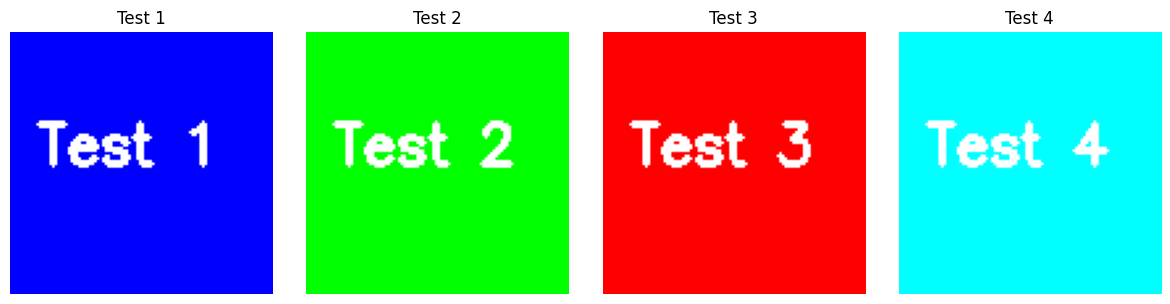


Rotated test images:


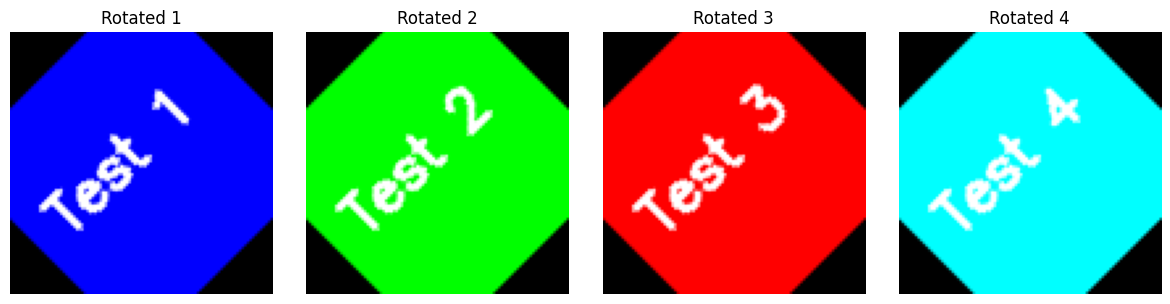

In [14]:
# First, create a few test images
def create_test_images():
    """Create a few test images for batch processing."""
    import cv2
    
    images = []
    
    # Create different colored squares
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
    
    for i, color in enumerate(colors):
        img = np.full((100, 100, 3), color, dtype=np.uint8)
        # Add some text
        cv2.putText(img, f"Test {i+1}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        images.append(img)
    
    return images

def batch_transform(images, transform_function, **kwargs):
    """
    Apply the same transformation to multiple images.
    
    Args:
        images: List of images
        transform_function: Function to apply to each image
        **kwargs: Additional arguments for the transform function
    
    Returns:
        List of transformed images
    """
    # TODO: Implement this function
    transformed = []
    
    for img in images:
        result = transform_function(img, **kwargs)
        if result is not None:
            transformed.append(result)
    
    return transformed

# Test batch processing
test_images = create_test_images()

print("Original test images:")
display.show_comparison(test_images, [f"Test {i+1}" for i in range(len(test_images))], figsize=(12, 3))

# Apply rotation to all images
rotated_batch = batch_transform(test_images, basic_transforms.rotate_image, angle=45)

print("\nRotated test images:")
display.show_comparison(rotated_batch, [f"Rotated {i+1}" for i in range(len(rotated_batch))], figsize=(12, 3))

## Summary

Congratulations! You've learned the fundamental image processing operations:

✅ **Loading and Saving Images**: Different color modes and file formats  
✅ **Image Information**: Properties, validation, and metadata  
✅ **Resizing**: Fixed size, aspect ratio preservation, different fit modes  
✅ **Rotation**: Arbitrary angles and optimized 90-degree rotations  
✅ **Flipping**: Horizontal, vertical, and both directions  
✅ **Cropping**: Manual and center cropping  
✅ **Translation**: Shifting images in different directions  
✅ **Padding**: Adding borders around images  
✅ **Display and Comparison**: Visualization techniques  

## Next Steps

In the next tutorial, we'll explore:
- Image filtering and smoothing techniques
- Edge detection algorithms
- Noise reduction methods
- Advanced morphological operations

Keep experimenting with different parameters and combinations of transformations!

In [15]:
# Clean up - close any remaining windows
display.close_all_windows()
print("🧹 Cleanup completed!")

🧹 Cleanup completed!
